In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
celebrity_data=pd.read_csv('datasets/celebrity_face_data.csv')

In [3]:
celebrity_data

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,celebrity_name
0,13.0,12.0,22.0,15.0,11.0,22.0,19.0,11.0,21.0,18.0,...,121.0,253.0,249.0,249.0,76.0,184.0,237.0,25.0,3.0,Alia Bhatt
1,27.0,27.0,39.0,29.0,32.0,40.0,30.0,34.0,38.0,32.0,...,239.0,243.0,247.0,248.0,240.0,9.0,29.0,2.0,251.0,Alia Bhatt
2,40.0,43.0,48.0,48.0,49.0,57.0,42.0,42.0,54.0,26.0,...,248.0,250.0,13.0,30.0,3.0,237.0,244.0,242.0,232.0,Alia Bhatt
3,11.0,6.0,7.0,18.0,11.0,15.0,28.0,19.0,30.0,38.0,...,237.0,238.0,236.0,239.0,234.0,244.0,247.0,72.0,25.0,Alia Bhatt
4,9.0,21.0,25.0,7.0,19.0,25.0,5.0,15.0,22.0,6.0,...,99.0,208.0,12.0,120.0,222.0,108.0,23.0,116.0,80.0,Alia Bhatt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,33.0,42.0,60.0,48.0,58.0,82.0,62.0,73.0,101.0,60.0,...,238.0,249.0,204.0,79.0,246.0,251.0,84.0,7.0,2.0,Shilpa Shetty
804,64.0,78.0,96.0,58.0,65.0,79.0,50.0,47.0,53.0,42.0,...,8.0,4.0,19.0,3.0,10.0,168.0,219.0,17.0,80.0,Shilpa Shetty
805,68.0,94.0,149.0,100.0,129.0,188.0,110.0,144.0,209.0,116.0,...,241.0,236.0,222.0,206.0,208.0,215.0,89.0,44.0,250.0,Shilpa Shetty
806,24.0,10.0,11.0,25.0,13.0,12.0,27.0,14.0,19.0,28.0,...,10.0,20.0,254.0,211.0,41.0,224.0,120.0,59.0,103.0,Shilpa Shetty


In [4]:
xdata=celebrity_data.drop('celebrity_name', axis=1)
ydata=celebrity_data.celebrity_name

In [5]:
xdata.head()

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,13.0,12.0,22.0,15.0,11.0,22.0,19.0,11.0,21.0,18.0,...,3.0,121.0,253.0,249.0,249.0,76.0,184.0,237.0,25.0,3.0
1,27.0,27.0,39.0,29.0,32.0,40.0,30.0,34.0,38.0,32.0,...,243.0,239.0,243.0,247.0,248.0,240.0,9.0,29.0,2.0,251.0
2,40.0,43.0,48.0,48.0,49.0,57.0,42.0,42.0,54.0,26.0,...,12.0,248.0,250.0,13.0,30.0,3.0,237.0,244.0,242.0,232.0
3,11.0,6.0,7.0,18.0,11.0,15.0,28.0,19.0,30.0,38.0,...,249.0,237.0,238.0,236.0,239.0,234.0,244.0,247.0,72.0,25.0
4,9.0,21.0,25.0,7.0,19.0,25.0,5.0,15.0,22.0,6.0,...,106.0,99.0,208.0,12.0,120.0,222.0,108.0,23.0,116.0,80.0


In [6]:
ydata.value_counts()

celebrity_name
Hema Malini         104
Rajkumar Rao        104
Shah Rukh Khan      101
Deepika Padukone     98
Alia Bhatt           92
Salman Khan          83
Amitabh Bachchan     74
Anupam Kher          61
Shilpa Shetty        50
Sachin Tendulkar     41
Name: count, dtype: int64

In [7]:
xtrain, xtest, ytrain, ytest=train_test_split(xdata, ydata, test_size=0.25, random_state=5)

In [8]:
ytest.value_counts()

celebrity_name
Rajkumar Rao        32
Shah Rukh Khan      27
Deepika Padukone    26
Hema Malini         26
Amitabh Bachchan    21
Salman Khan         20
Alia Bhatt          18
Anupam Kher         12
Shilpa Shetty       11
Sachin Tendulkar     9
Name: count, dtype: int64

In [9]:
pipe=Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=1))])
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=1))])

In [10]:
score=pipe.score(xtrain, ytrain)
score

0.9537953795379538

In [11]:
score=pipe.score(xtest, ytest)
score

0.4158415841584158

In [12]:
report=classification_report(ytest, pipe.predict(xtest))
print(report)

                  precision    recall  f1-score   support

      Alia Bhatt       0.21      0.39      0.27        18
Amitabh Bachchan       0.62      0.62      0.62        21
     Anupam Kher       0.29      0.17      0.21        12
Deepika Padukone       0.48      0.58      0.53        26
     Hema Malini       0.48      0.50      0.49        26
    Rajkumar Rao       0.44      0.56      0.49        32
Sachin Tendulkar       0.00      0.00      0.00         9
     Salman Khan       0.53      0.40      0.46        20
  Shah Rukh Khan       0.32      0.30      0.31        27
   Shilpa Shetty       0.00      0.00      0.00        11

        accuracy                           0.42       202
       macro avg       0.34      0.35      0.34       202
    weighted avg       0.39      0.42      0.40       202



C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:151

In [13]:
model_params={
    'svc': {
        'model': SVC(C=1),
        'params': {
            'svc__kernel': ['rbf', 'linear'],
        }
    },
    'rfc': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [10,30,40]
        }
    },
    'logistic': {
        'model': LogisticRegression(),
        'params': {
            #'logisticregression__solver': ['lbfg']
        }
    }
}

In [14]:
scores=[]
best_estimators={}
for name,mp in model_params.items():
    print(name, "model")
    pipe=make_pipeline(StandardScaler(), mp['model'])
    model=GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    model.fit(xtrain, ytrain)
    scores.append({
        'model_name': name,
        'best_score': model.best_score_,
        'best_params': model.best_params_
    })
    best_estimators[name]=model.best_estimator_

svc model
rfc model
logistic model


In [15]:
pd.DataFrame(scores)

,model_name,best_score,best_params
0,svc,0.453773,{'svc__kernel': 'linear'}
1,rfc,0.346498,{'randomforestclassifier__n_estimators': 30}
2,logistic,0.438911,{}


In [16]:
best_estimators['svc'].score(xtest, ytest)

0.4801980198019802

In [17]:
best_estimators['rfc'].score(xtest, ytest)

0.3712871287128713

In [18]:
best_estimators['logistic'].score(xtest, ytest)

0.4752475247524752

In [19]:
pipe=Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression())])
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [20]:
pipe.score(xtrain, ytrain)

1.0

In [21]:
pipe.score(xtest, ytest)

0.4752475247524752

In [23]:
pipe=best_estimators['logistic']

In [22]:
cm=confusion_matrix(ytest, pipe.predict(xtest))
cm

array([[ 6,  1,  1,  4,  1,  0,  2,  0,  1,  2],
       [ 0, 14,  1,  3,  0,  1,  0,  2,  0,  0],
       [ 0,  2,  8,  0,  0,  0,  0,  2,  0,  0],
       [ 4,  0,  0, 14,  2,  2,  0,  2,  0,  2],
       [ 2,  1,  0,  3, 15,  2,  0,  0,  2,  1],
       [ 1,  2,  1,  1,  0, 16,  1,  2,  7,  1],
       [ 1,  0,  0,  0,  0,  1,  4,  0,  3,  0],
       [ 2,  1,  3,  2,  0,  2,  0,  7,  2,  1],
       [ 1,  1,  2,  2,  1,  4,  2,  4,  9,  1],
       [ 2,  0,  0,  2,  3,  0,  1,  0,  0,  3]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual celebrities')

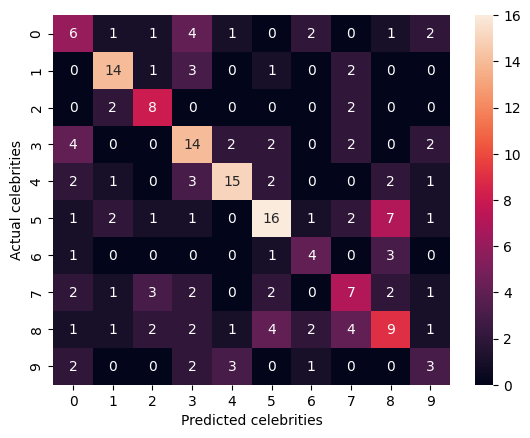

In [23]:
import seaborn as sn
from matplotlib import pyplot as plt
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted celebrities')
plt.ylabel('Actual celebrities')

In [283]:
celebrities=ydata.unique()
celebrities

array(['Alia Bhatt', 'Amitabh Bachchan', 'Anupam Kher',
       'Deepika Padukone', 'Hema Malini', 'Rajkumar Rao',
       'Sachin Tendulkar', 'Salman Khan', 'Shah Rukh Khan',
       'Shilpa Shetty'], dtype=object)

In [315]:
def wrong_pred(actual, pred):
  wrong=[]
  for (_,data),celeb in zip(xtest.iterrows(), ytest):
    if celeb==celebrities[actual] and pipe.predict([data])==celebrities[pred]:
      wrong.append(data)
  return wrong

In [ ]:
wrong=wrong_pred(7,5)
len(wrong)

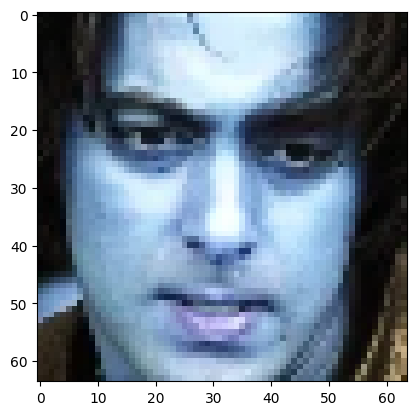

In [369]:
image=np.array(wrong[4])[:-4096].reshape(64,64,-1)
plt.imshow(image/255)

In [ ]:
import pickle
with open("/content/drive/MyDrive/Indian Celebrity Prediction/model/celebrity_prediction_model.pickle", "wb") as file:
    pickle.dump(pipe, file)

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import pywt
import pickle
import os

In [ ]:
haar_cascade=cv2.CascadeClassifier('/usr/local/lib/python3.10/dist-packages/cv2/data/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('/usr/local/lib/python3.10/dist-packages/cv2/data/haarcascade_eye.xml')

In [ ]:
with open("/content/drive/MyDrive/Indian Celebrity Prediction/model/celebrity_prediction_model.pickle", "rb") as file:
 model=pickle.load(file)

In [ ]:
def get_cropped_faces_with_2_eyes(image_path):
 original_image=cv2.imread(image_path)
 gray_image=cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
 faces=haar_cascade.detectMultiScale(gray_image, 1.2, 5)
 faces_list=[]
 for x,y,w,h in faces:
  face_gray=gray_image[y:y+h, x:x+w]
  eyes=eye_cascade.detectMultiScale(face_gray)
  if len(eyes)>=2:
   face_img=original_image[y:y+h, x:x+w]
   faces_list.append(face_img)
 return faces_list

In [ ]:
def image_wavelet_transform(image, mode='haar', level=1):
 image_gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 imageArray=np.float32(image_gray)/255
 coeff=pywt.wavedec2(imageArray, mode, level=level)
 coeff[0]*=0
 imageArray_wt=pywt.waverec2(coeff, mode)
 imageArray_wt=np.uint8(imageArray_wt*255)
 return imageArray_wt

In [ ]:
def preprocess_predict_image(image):
 faces=get_cropped_faces_with_2_eyes(image)
 faces_name=[]
 for face_img in faces:
  img_scaled=cv2.resize(face_img, (64, 64))
  img_wt=image_wavelet_transform(face_img, mode='db1', level=6)
  img_wt_scaled=cv2.resize(img_wt, (64, 64))
  combined_img=np.vstack((img_scaled.reshape(-1,1), img_wt_scaled.reshape(-1,1)))
  combined_img=combined_img.reshape(1,-1)
  combined_img=np.float32(combined_img)

  name=model.predict(combined_img)[0]
  faces_name.append(name)

 return pd.DataFrame({"face_img": faces, "face_name": faces_name})

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


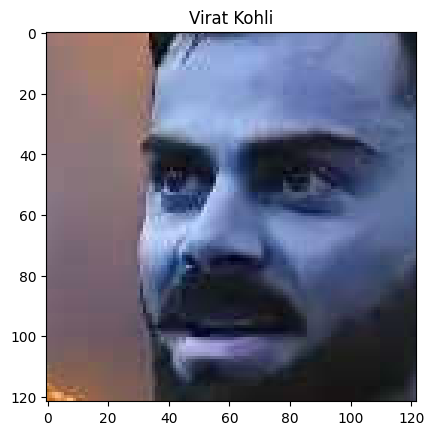

In [ ]:
if __name__=="__main__":
 path="/content/drive/MyDrive/Indian Celebrity Prediction/datasets/images/test images"
 image=path+'/'+os.listdir(path)[0]
 pred_celebrities=preprocess_predict_image(image)
 if pred_celebrities.empty:
    print("no face found")
for i,face in pred_celebrities.iterrows():
    plt.subplot(len(pred_celebrities),1,i+1)
    plt.imshow(face["face_img"])
    plt.title(face["face_name"])
plt.show()